# Support Vector Regression (SVR)

<img src="supportVectorRegression.jpeg" alt="Support Vector Regression" style="width: 600px;"/>

__SVR__ is very unique compared to the other regression lines studied, due to how it deals with the error created through best fit. First, __SVR__ uses the dataset to calculate two error boundary lines that form a region called the $\large\epsilon$__-Sensitive Tube__. Any data points that exist within this tube are disregarded in the error calcultion. The data points that exist outside, which are called __Slack Variables__ or __Support Vectors__, are then fed into the following error equation:

$$\LARGE \frac{1}{2}||w||^2 + C\sum_{i=1}^m{(\xi_i + \xi^*_i) \rightarrow min}$$

Using this error equation, the __SVR__ modifies the error boundaries and thus modifies the best-fit line. This modified best-fit line is the final result of __SVR__. 

## Non-Linear SVR

<img src="nonLinear.png" alt="Mapping data to a higher dimension." style="width: 700px;" />

__Non-Linear SVR__ involves using the *Kernel Trick*, which is covered in the Classification section. It uses a *Kernel* function that simulates mapping data to a higher dimension, then using the mapped data points to perform **SVR** and create a *hyperplane regressor* instead of a *linear regressor*.

<hr>

## Code

__Setting up the dataset:__

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

"""
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(len(y), 1)) # The y vector needs to be reshaped into a matrix

<hr>

__Fitting the Regression Model & Making a Prediction:__

In [2]:
# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X, y)

# Predicting a new result (Need to revert the results back to their unscaled form)
test = [[6.5]]
y_pred = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(test)))
                                                                                
y_pred

C:\Users\Dinesh Balakrishnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([170370.0204065])

<hr>

__Visualizing the Results:__<br>

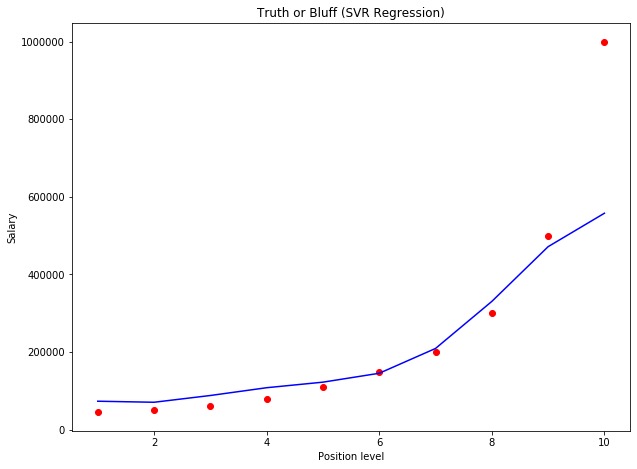

[]

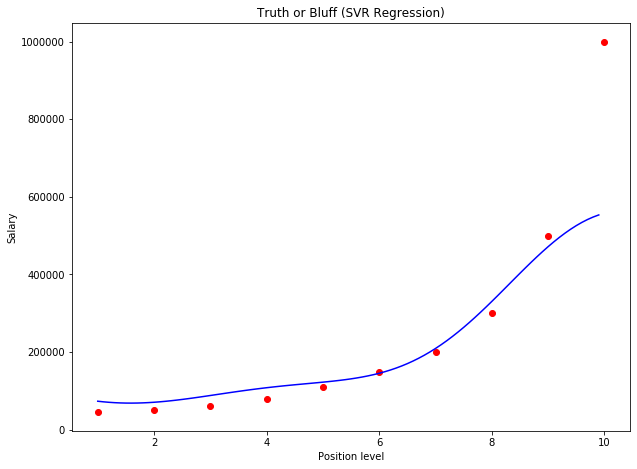

In [3]:
# Graph Scaling
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5

# Visualising the Regression results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr_reg.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.plot()